In [1964]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [1965]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1966]:
# смотрим где у нас пустые значения
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1967]:
# Убираем лишнее(столбцы где, много пропусков и строки, где Embarked неизвестны)
df = df.drop(columns=['Cabin'])

df = df.dropna(axis=0, subset=['Embarked', ])

# заполняем в столбце age пустые ячейки средним возростом(28 лет)
print(f"Средний возраст: {df['Age'].median()}")
df['Age'] = df['Age'].fillna(df['Age'].median())

df.isnull().sum()

Средний возраст: 28.0


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1968]:
df.info()
#нужно, чтобы везде тип был интом или флоат

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [1969]:
# Делам из обьектов цифры 
cathegorical_columns = df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
for col in cathegorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,522,7.2500,2
1,2,1,1,190,0,38.0,1,0,595,71.2833,0
2,3,1,3,353,0,26.0,0,0,668,7.9250,2
3,4,1,1,272,0,35.0,1,0,48,53.1000,2
4,5,0,3,15,1,35.0,0,0,471,8.0500,2


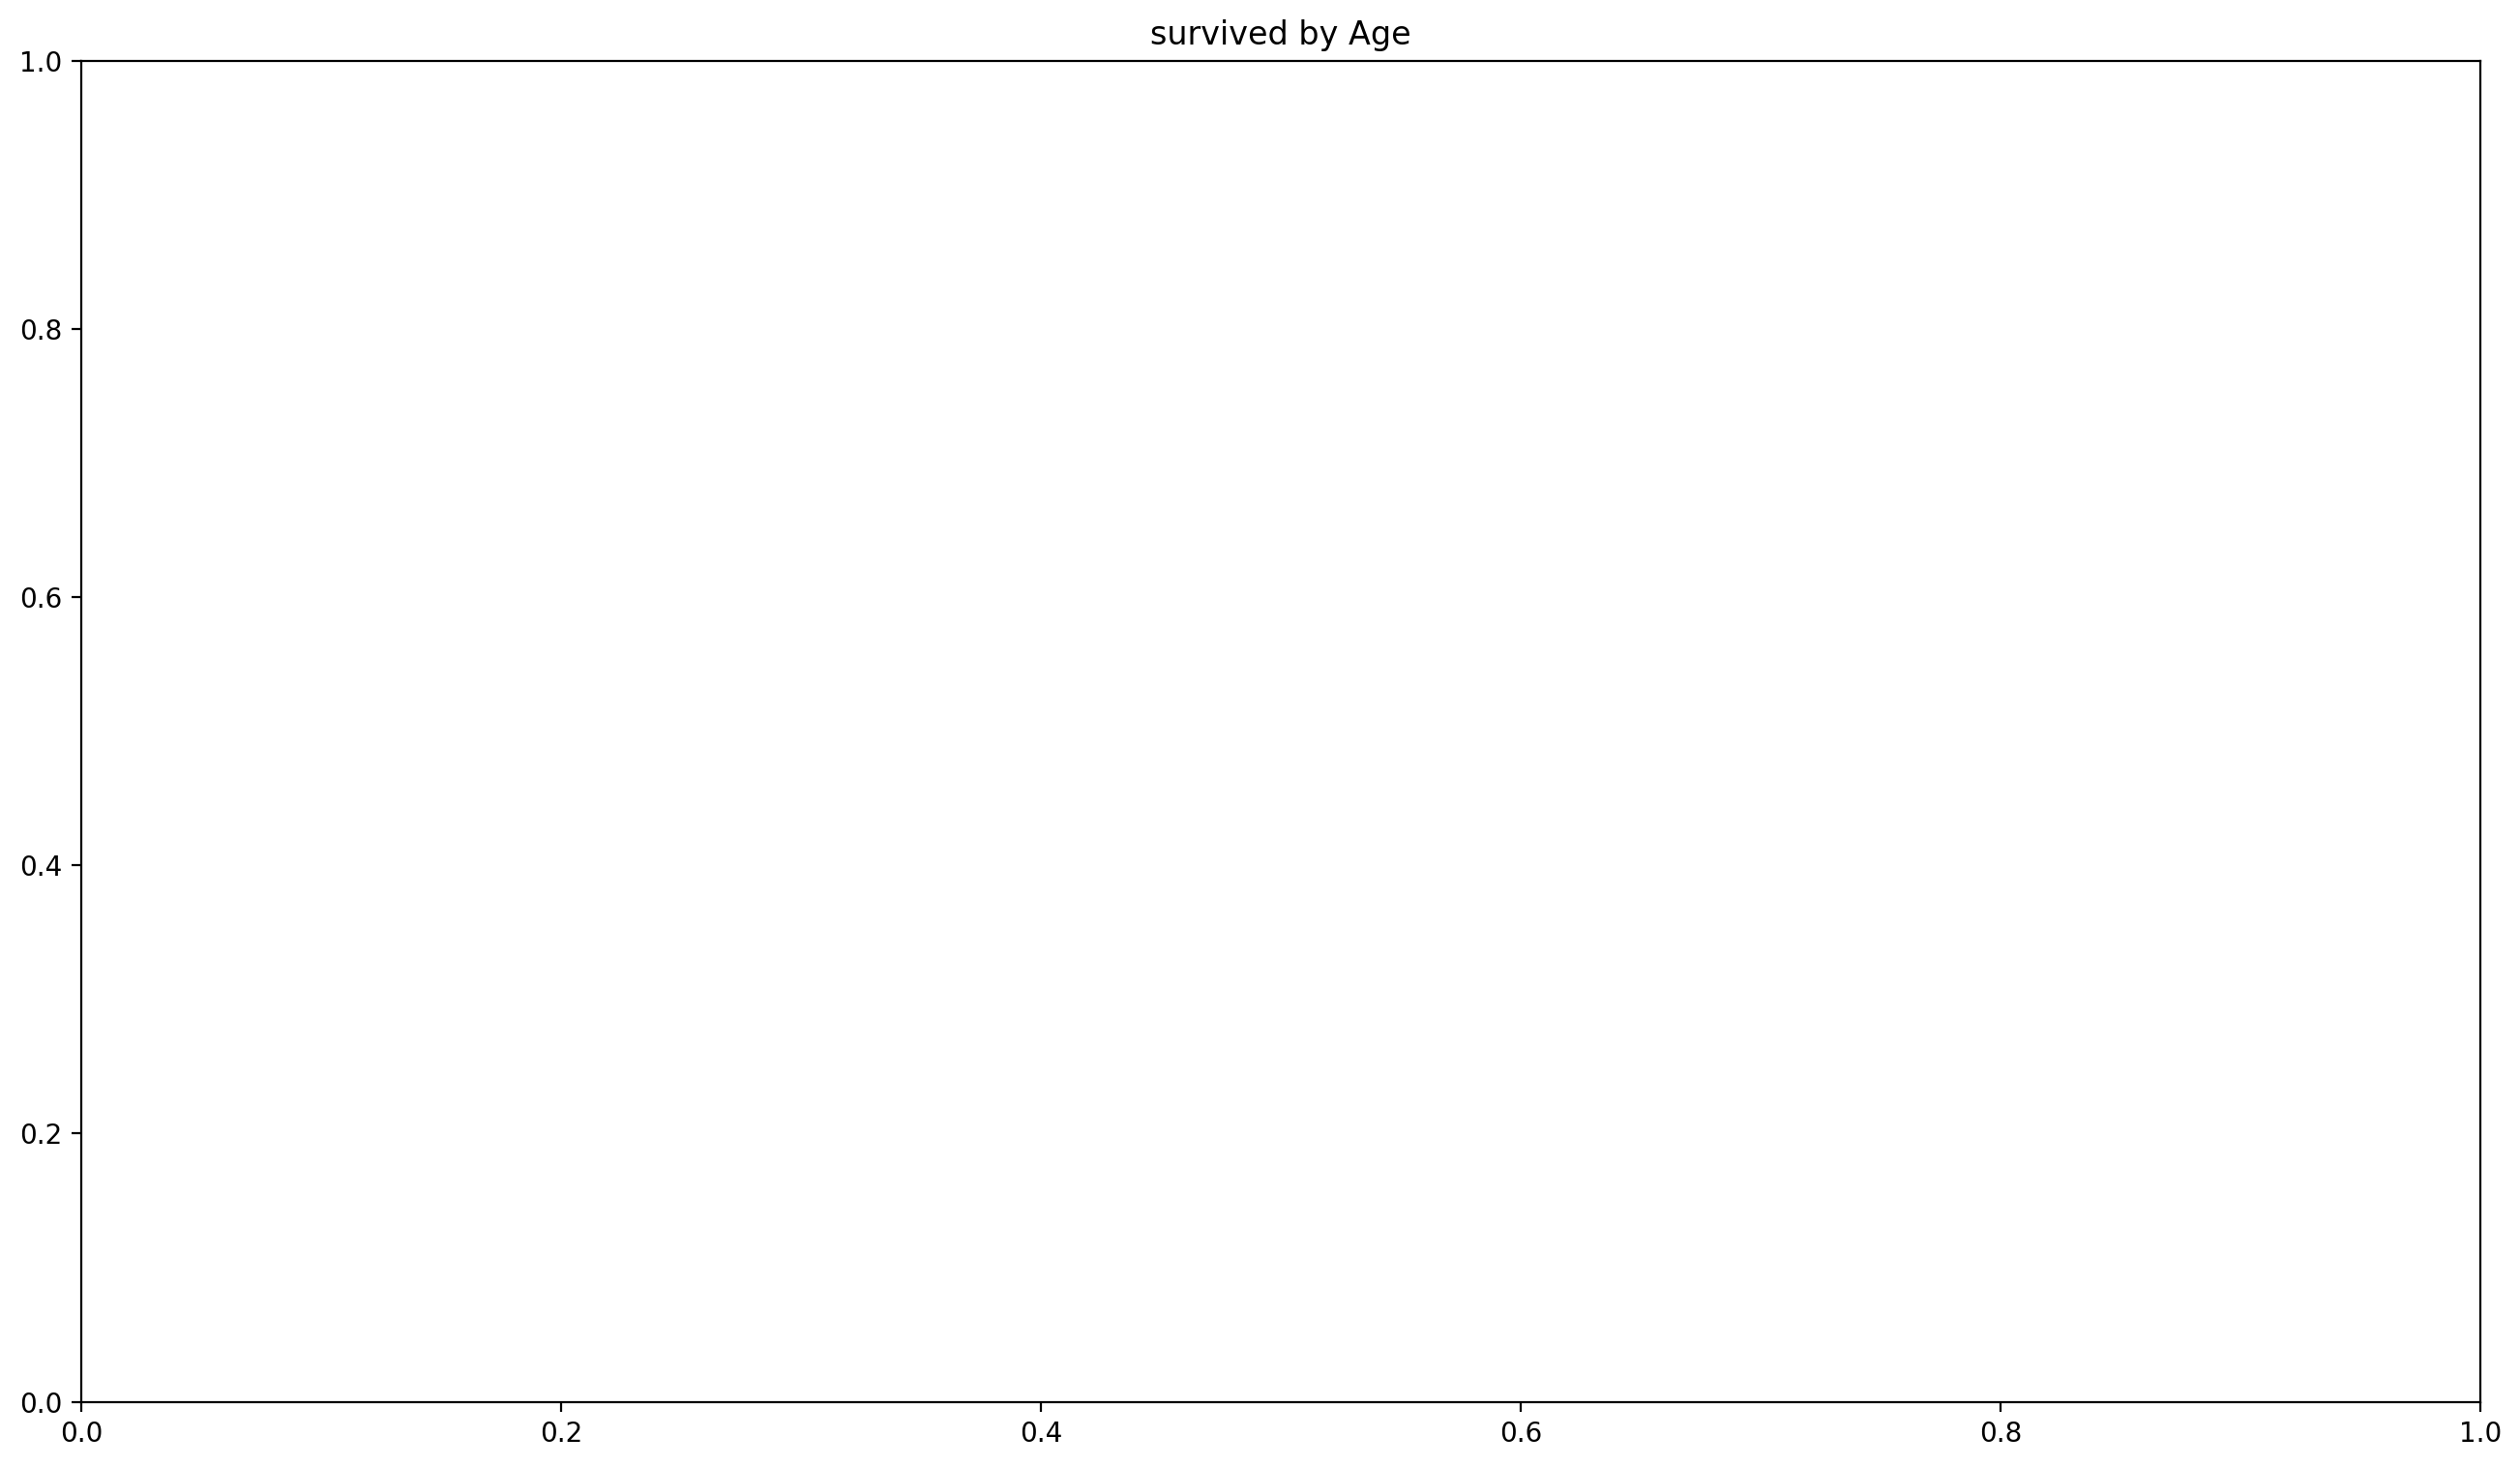

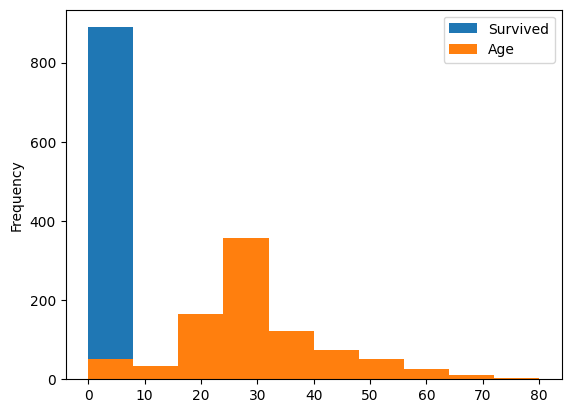

In [1970]:
plt.figure(figsize=(16,9),dpi=200)

plt.title('survived by Age')
# sns.histplot(df[(df['Survived'] == 1)]['Age'], bins=25)
df[['Survived', 'Age']].plot(kind='hist')

# создаем новый признак FE1 если возрост от 18 до 35(не включая 28 лет, тк я заполнил наны средним возростом)
df['FE1'] = np.where((df['Age'] > 18) & (df['Age'] < 35) & (df['Age'] != 28), 1, 0)
# df['FE2'] = np.where(df['Pclass'] > 1, 1, 0)

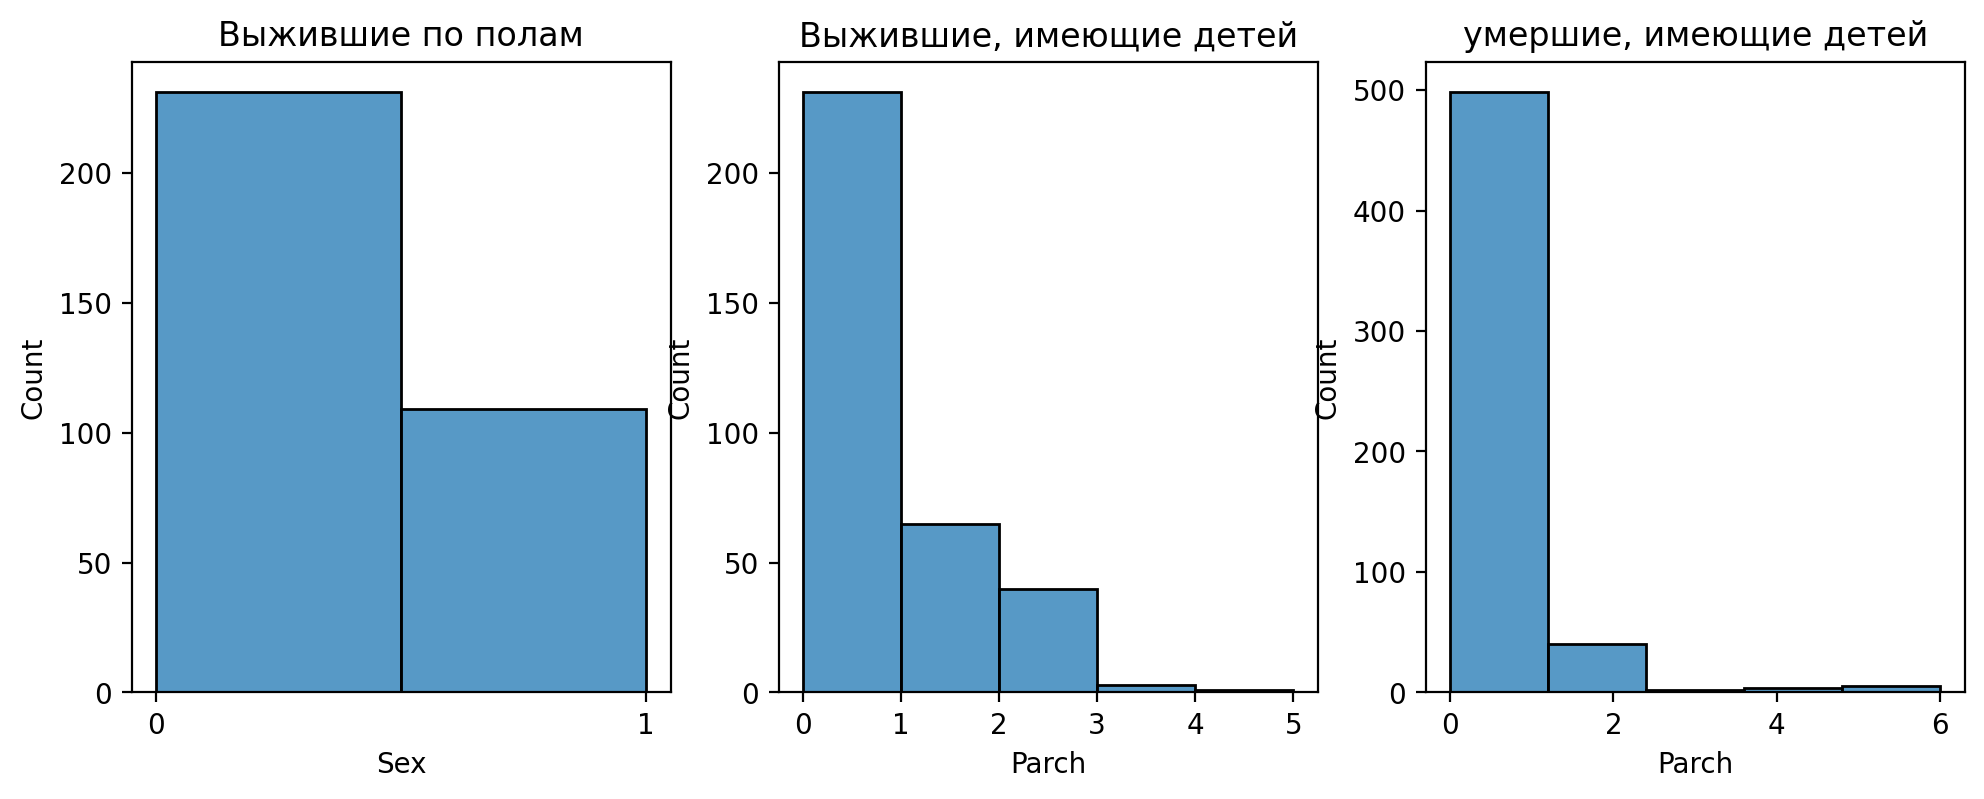

In [1971]:
plt.figure(figsize=(16,9),dpi=200)


plt.subplot(2, 4, 1)
plt.xticks([0, 1])
sns.histplot(df[(df['Survived'] == 1)]['Sex'], bins=2)
plt.title('Выжившие по полам')


plt.subplot(2, 4, 2)
sns.histplot(df[(df['Survived'] == 1)]['Parch'], bins=5)
plt.title('Выжившие, имеющие детей')


plt.subplot(2, 4, 3)
sns.histplot(df[(df['Survived'] == 0)]['Parch'], bins=5)
plt.title('умершие, имеющие детей')

# plt.subplot(2, 4, 3)
# sns.histplot(df[(df['Sex'] == 0)]['Parch'], bins=5)
# plt.title('Женщины, имеющие детей')

plt.show()

# Ниже видно, что женщины до 2 детей выживают чаще 
df['FE2'] = np.where((df['Sex'] ==1) & (df['Parch'] <= 1), 1, 0)

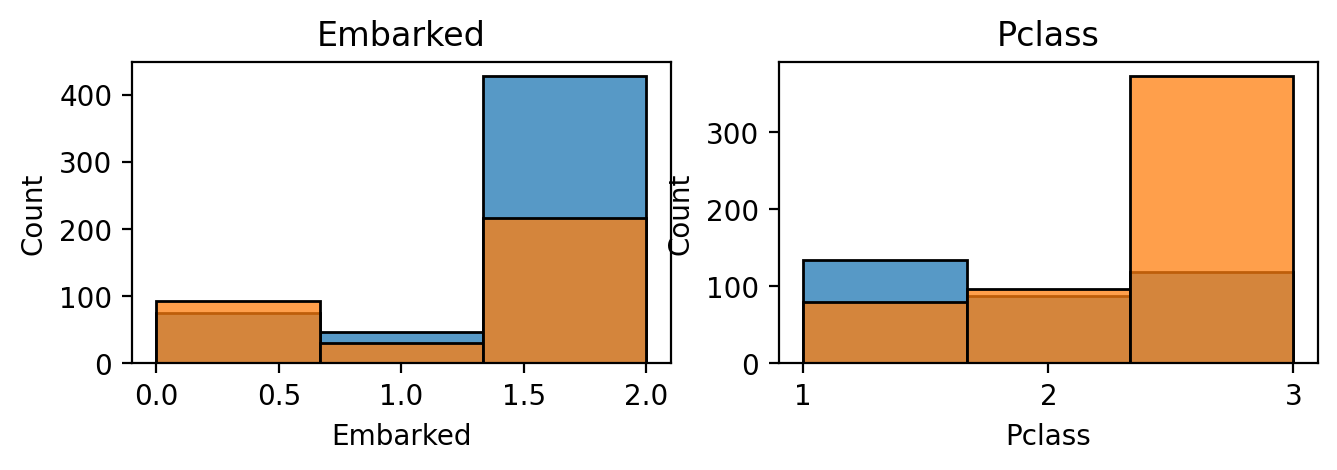

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FE1,FE2,FE4
0,1,0,108,1,22.0,1,0,522,7.2500,1,1,0
1,2,1,190,0,38.0,1,0,595,71.2833,0,0,0
2,3,1,353,0,26.0,0,0,668,7.9250,1,0,0
3,4,1,272,0,35.0,1,0,48,53.1000,0,0,1
4,5,0,15,1,35.0,0,0,471,8.0500,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,547,1,27.0,0,0,100,13.0000,1,1,0
887,888,1,303,0,19.0,0,0,14,30.0000,1,0,1
888,889,0,412,0,28.0,1,2,674,23.4500,0,0,0
889,890,1,81,1,26.0,0,0,8,30.0000,1,1,0


In [1972]:
plt.figure(figsize=(16,9),dpi=200)


# plt.subplot(2, 4, 1)
# sns.histplot(df[(df['Survived'] == 1)]['Fare'], bins=25)
# plt.title('Fare')

plt.subplot(4, 4, 2)
sns.histplot(df[(df['Survived'] == 0)]['Embarked'], bins=3)
plt.title('Embarked')
plt.subplot(4, 4, 2)
sns.histplot(df[(df['Survived'] == 1)]['Embarked'], bins=3)



plt.subplot(4, 4, 3)
plt.title('Pclass')
plt.xticks([1, 2, 3])
sns.histplot(df[(df['Survived'] == 1)]['Pclass'], bins=3)
plt.subplot(4, 4, 3)
plt.xticks([1, 2, 3])
sns.histplot(df[(df['Survived'] == 0)]['Pclass'], bins=3)

plt.show()

# больше всего выжило при Embarked=2 и Pclass=1
df['FE4'] = np.where((df['Embarked'] == 2) & (df['Pclass'] == 1), 1, 0)
df = df.drop(columns=["Embarked", "Pclass"])
df

In [1973]:
# складываю количество братьев/сестрер с количеством их сыновей/дочерей
# также умножаю количество сыновей/дочерей на 5(так как они важнее?)
# убираю столбцы "SibSp", "Parch"
df['FE3'] = df['SibSp'] + df['Parch'] * 5
df = df.drop(columns=["SibSp", "Parch"])
df

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,FE1,FE2,FE4,FE3
0,1,0,108,1,22.0,522,7.2500,1,1,0,1
1,2,1,190,0,38.0,595,71.2833,0,0,0,1
2,3,1,353,0,26.0,668,7.9250,1,0,0,0
3,4,1,272,0,35.0,48,53.1000,0,0,1,1
4,5,0,15,1,35.0,471,8.0500,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,547,1,27.0,100,13.0000,1,1,0,0
887,888,1,303,0,19.0,14,30.0000,1,0,1,0
888,889,0,412,0,28.0,674,23.4500,0,0,0,11
889,890,1,81,1,26.0,8,30.0000,1,1,0,0


In [1974]:
df.head(2)

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,FE1,FE2,FE4,FE3
0,1,0,108,1,22.0,522,7.2500,1,1,0,1
1,2,1,190,0,38.0,595,71.2833,0,0,0,1


In [1975]:
data = df.drop(columns=["Name", "Ticket", "PassengerId", "Fare"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Sex       889 non-null    int32  
 2   Age       889 non-null    float64
 3   FE1       889 non-null    int32  
 4   FE2       889 non-null    int32  
 5   FE4       889 non-null    int32  
 6   FE3       889 non-null    int64  
dtypes: float64(1), int32(4), int64(2)
memory usage: 41.7 KB


In [1976]:
# итоговый датасет для обучения моделей
data.head()

,Survived,Sex,Age,FE1,FE2,FE4,FE3
0,0,1,22.0,1,1,0,1
1,1,0,38.0,0,0,0,1
2,1,0,26.0,1,0,0,0
3,1,0,35.0,0,0,1,1
4,0,1,35.0,0,1,0,0


In [1977]:
# Все цифры ниже проставлены случайно(или полуслучайно)

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout

X_cols = range(1, len(data.columns))
y_cols = 0
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, X_cols], data.iloc[:, y_cols], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model = CatBoostClassifier(iterations=100, learning_rate=0.1)
model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.15)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/8


c:\Users\ditriy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4343 - loss: 0.6947 - val_accuracy: 0.6355 - val_loss: 0.6908
Epoch 2/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6896 - loss: 0.6897 - val_accuracy: 0.7103 - val_loss: 0.6856
Epoch 3/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6981 - loss: 0.6828 - val_accuracy: 0.7290 - val_loss: 0.6761
Epoch 4/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7460 - loss: 0.6700 - val_accuracy: 0.7570 - val_loss: 0.6598
Epoch 5/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7365 - loss: 0.6600 - val_accuracy: 0.7570 - val_loss: 0.6384
Epoch 6/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7781 - loss: 0.6409 - val_accuracy: 0.7570 - val_loss: 0.6174
Epoch 7/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7947 - loss: 0.6141 - val_accuracy: 0.7944 - val_loss: 0.6033
Epoch 8/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8068 - loss: 0.5984 - val_accuracy: 0.8224 - val_loss: 0.5949
6/6 ━━━━━

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8211 - loss: 0.6093 - val_accuracy: 0.8112 - val_loss: 0.6140
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8072 - loss: 0.5741 - val_accuracy: 0.8112 - val_loss: 0.6084
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7975 - loss: 0.5916 - val_accuracy: 0.8112 - val_loss: 0.6043
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8253 - loss: 0.5774 - val_accuracy: 0.8112 - val_loss: 0.5996
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8193 - loss: 0.5780 - val_accuracy: 0.8112 - val_loss: 0.5979
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8058 - loss: 0.5813 - val_accuracy: 0.8042 - val_loss: 0.5992
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8301 - loss: 0.5604 - val_accuracy: 0.8112 - val_loss: 0.5949
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8295 - loss: 0.5642 - val_accuracy: 0.8042 - val_loss:

<function matplotlib.pyplot.show(close=None, block=None)>

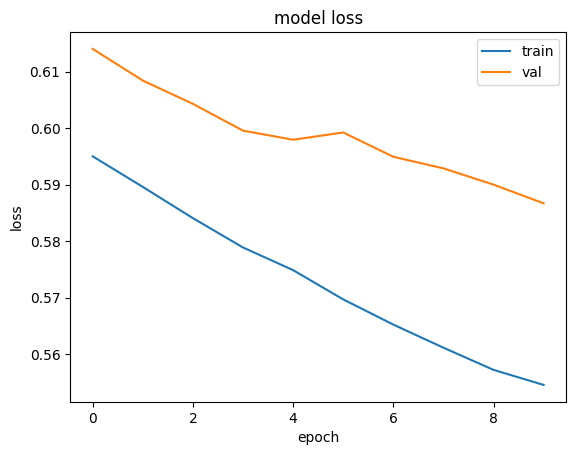

In [1978]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show

In [1979]:
# кросс-валидация

from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=32)
scores = cross_val_score(clf, data.iloc[:, X_cols], data.iloc[:, y_cols], cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.79 accuracy with a standard deviation of 0.02


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


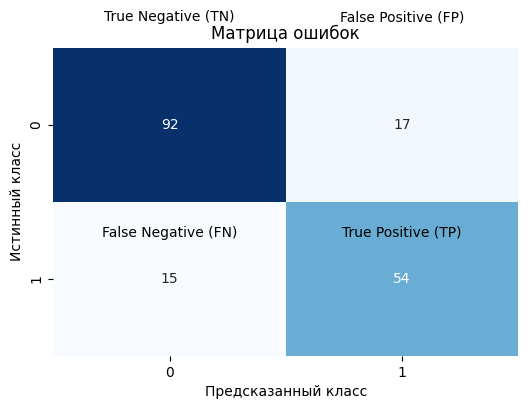

In [1980]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Получаем предсказания вероятностей класса 1
y_pred_proba = model.predict(X_test)

# Преобразуем вероятности в бинарные предсказания
y_pred = (y_pred_proba > 0.5).astype(int)

# Создаем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Отображаем матрицу ошибок с подписями
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок")

# Добавим текстовые подписи для каждой ячейки
plt.text(0.5, -0.2, 'True Negative (TN)', ha='center', va='center', color='black')
plt.text(1.5, -0.2, 'False Positive (FP)', ha='center', va='center', color='black')
plt.text(0.5, 1.2, 'False Negative (FN)', ha='center', va='center', color='black')
plt.text(1.5, 1.2, 'True Positive (TP)', ha='center', va='center', color='black')

plt.show()


 # Выводы
Пол, возраст — самые влияющие на выживание факторы; 
женщины с 0-1 детьми намного чаще выживали.
Наличие родственников и какой класс был у человека также влияло на выживание.

Наличие плохих(?) результатов можно обьяснить маленьким датасетом

<b>Расшифровка матрицы ошибок:</b>
На 109 предсказанных невыживших людей:
True Negative (TN): Модель правильно предсказала "Не выжил" 92 раза , когда истинный класс — "Не выжил".
False Negative (FN): Модель ошибочно предсказала "Не выжил" 17 раза, когда истинный класс — "Выжил".

На 69 предсказанных выживших людей:
True Positive (TP): Модель правильно предсказала "Выжил" 54 раз, когда истинный класс — "Выжил".
False Positive (FP): Модель ошибочно предсказала "Выжил 15 раз ", когда истинный класс — "Не выжил".

Из матрицы ошибок понятно, что модель хорошо предсказывает не выживет ли человек.


In [1981]:
# пробую модель LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

acc

0.797752808988764

вывод написан чуть выше